In [ ]:
!pip install pdf2image

In [ ]:
!pip install --use-pep517 python-poppler

In [ ]:
!git clone 'https://github.com/facebookresearch/detectron2'

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

In [1]:
import os
os.chdir("/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/src")
cwd = os.getcwd()

print(cwd)

/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/src


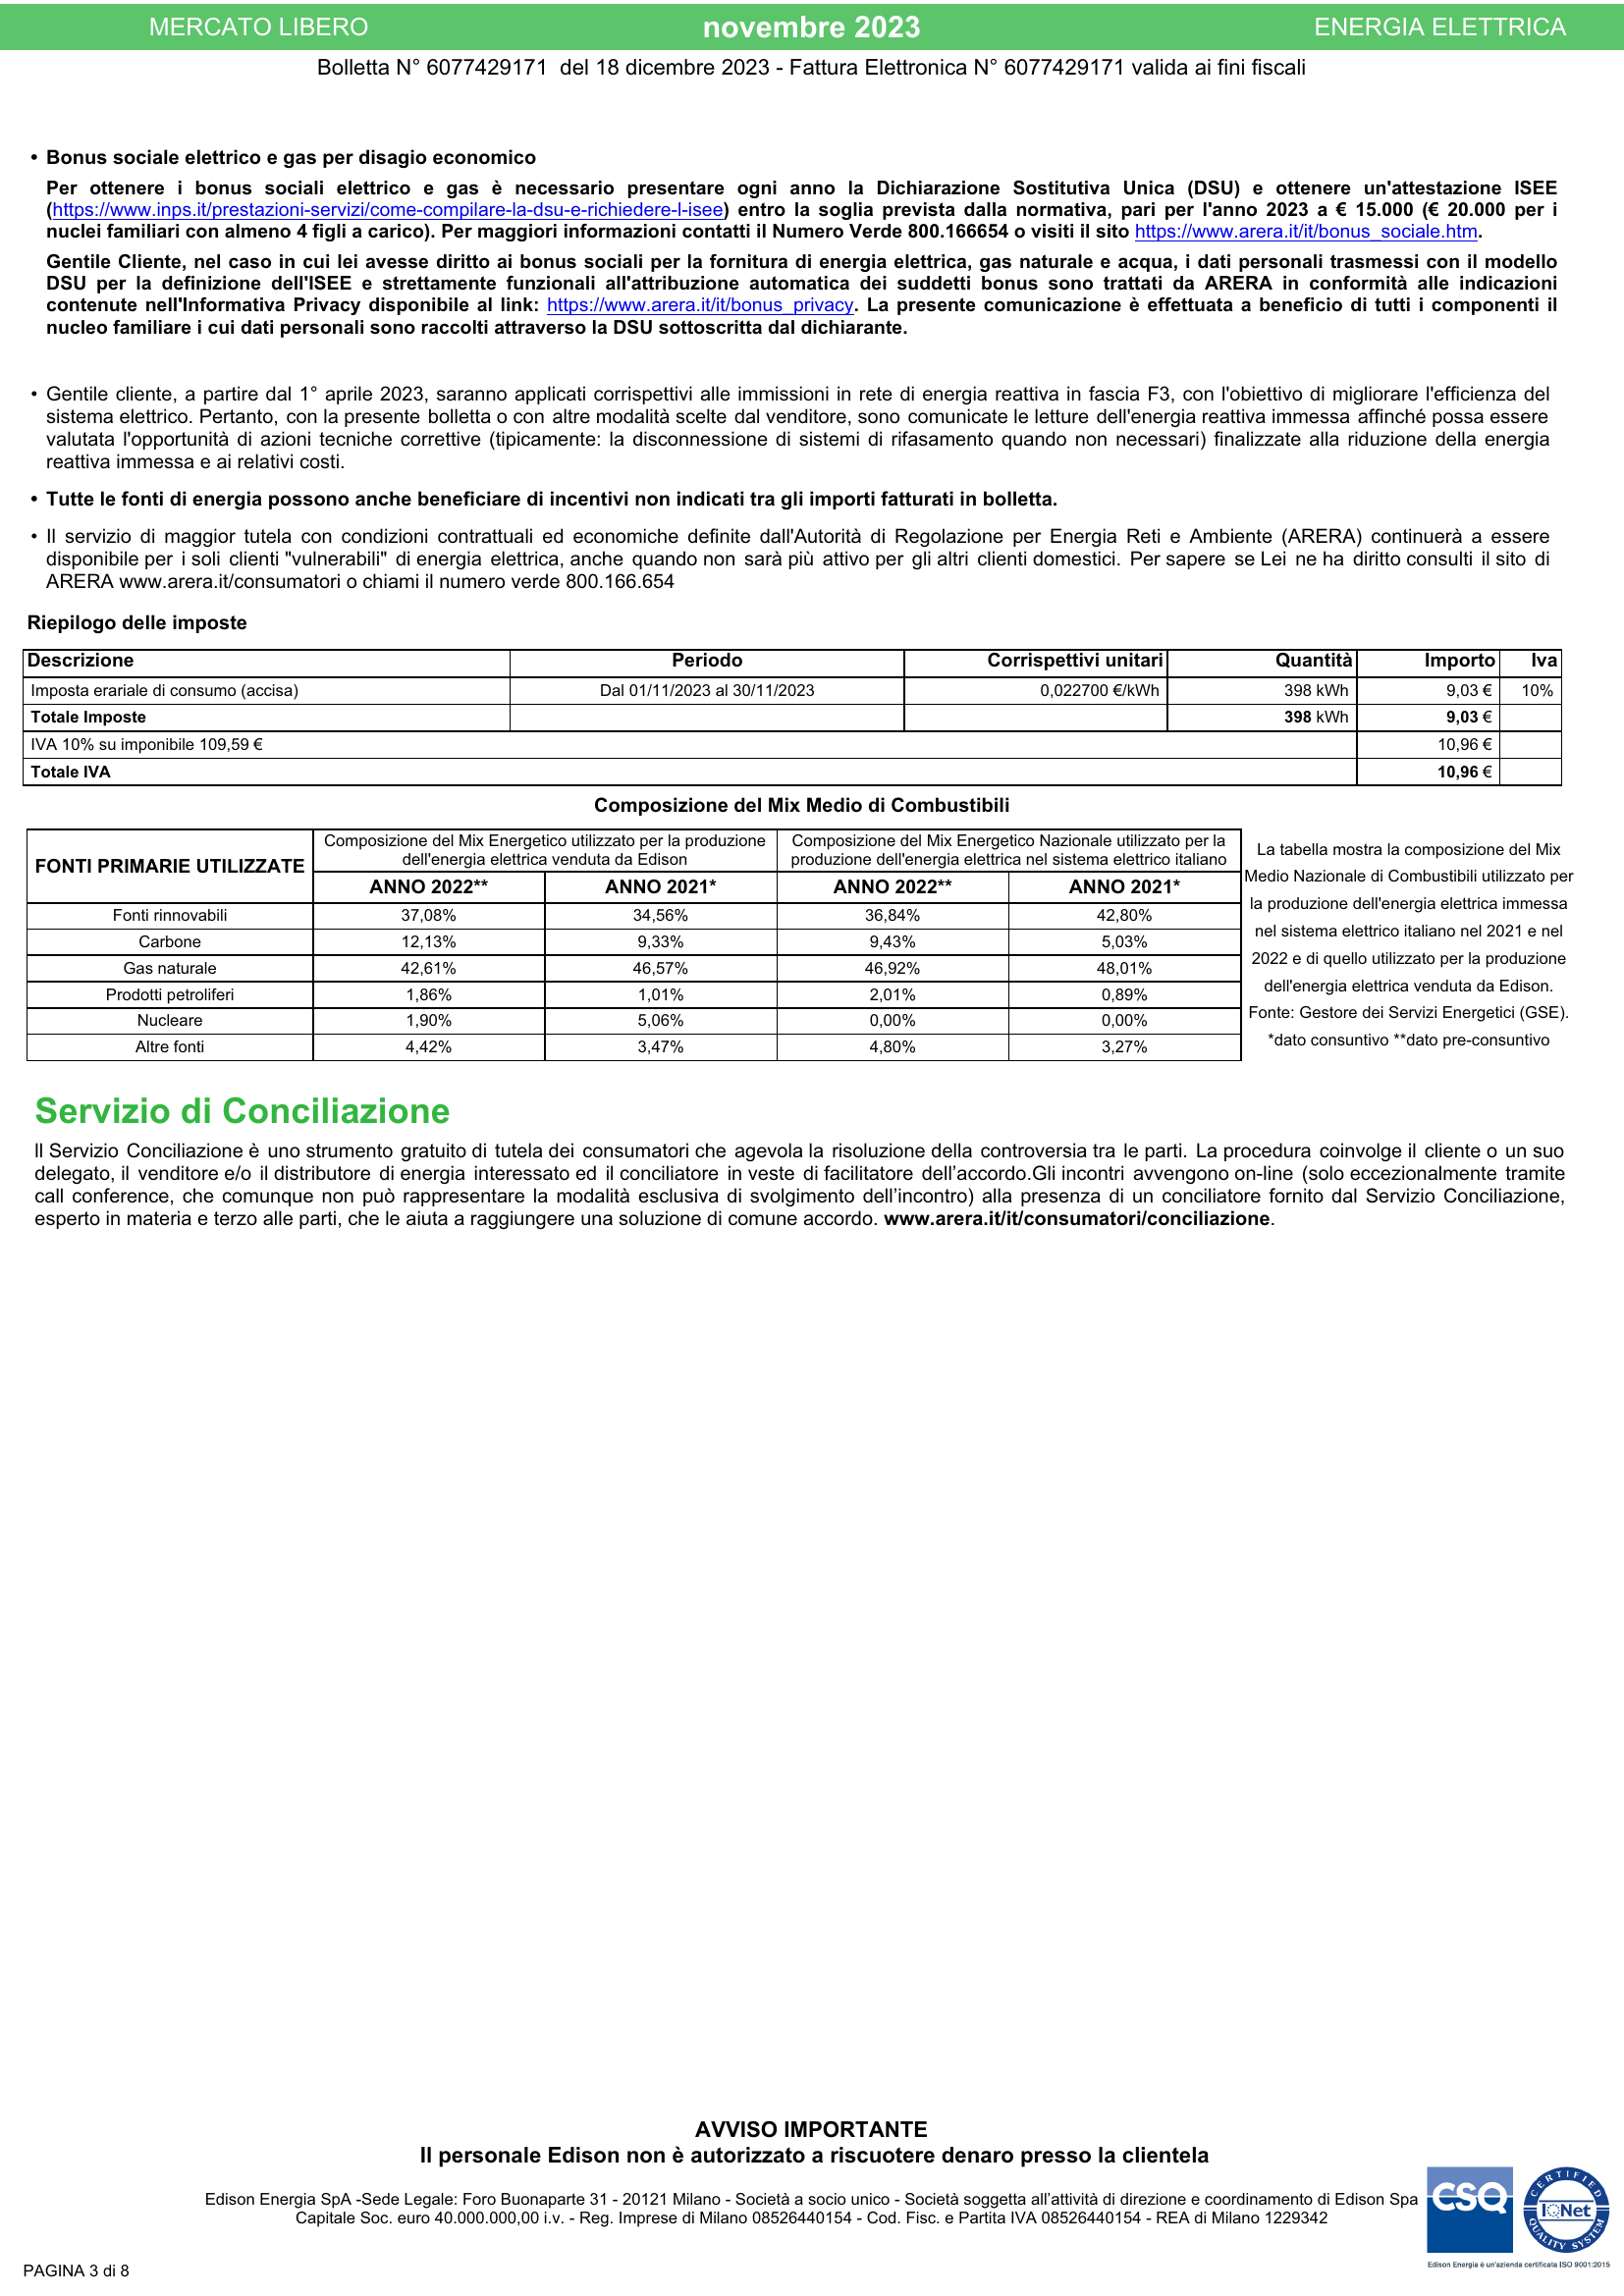

In [5]:
# READ AS IMAGE
import pdf2image
doc = pdf2image.convert_from_path("/home/giacomo/Scaricati/dettagliata.pdf")
len(doc) #<-- check num pages
doc[2]   #<-- visualize a page

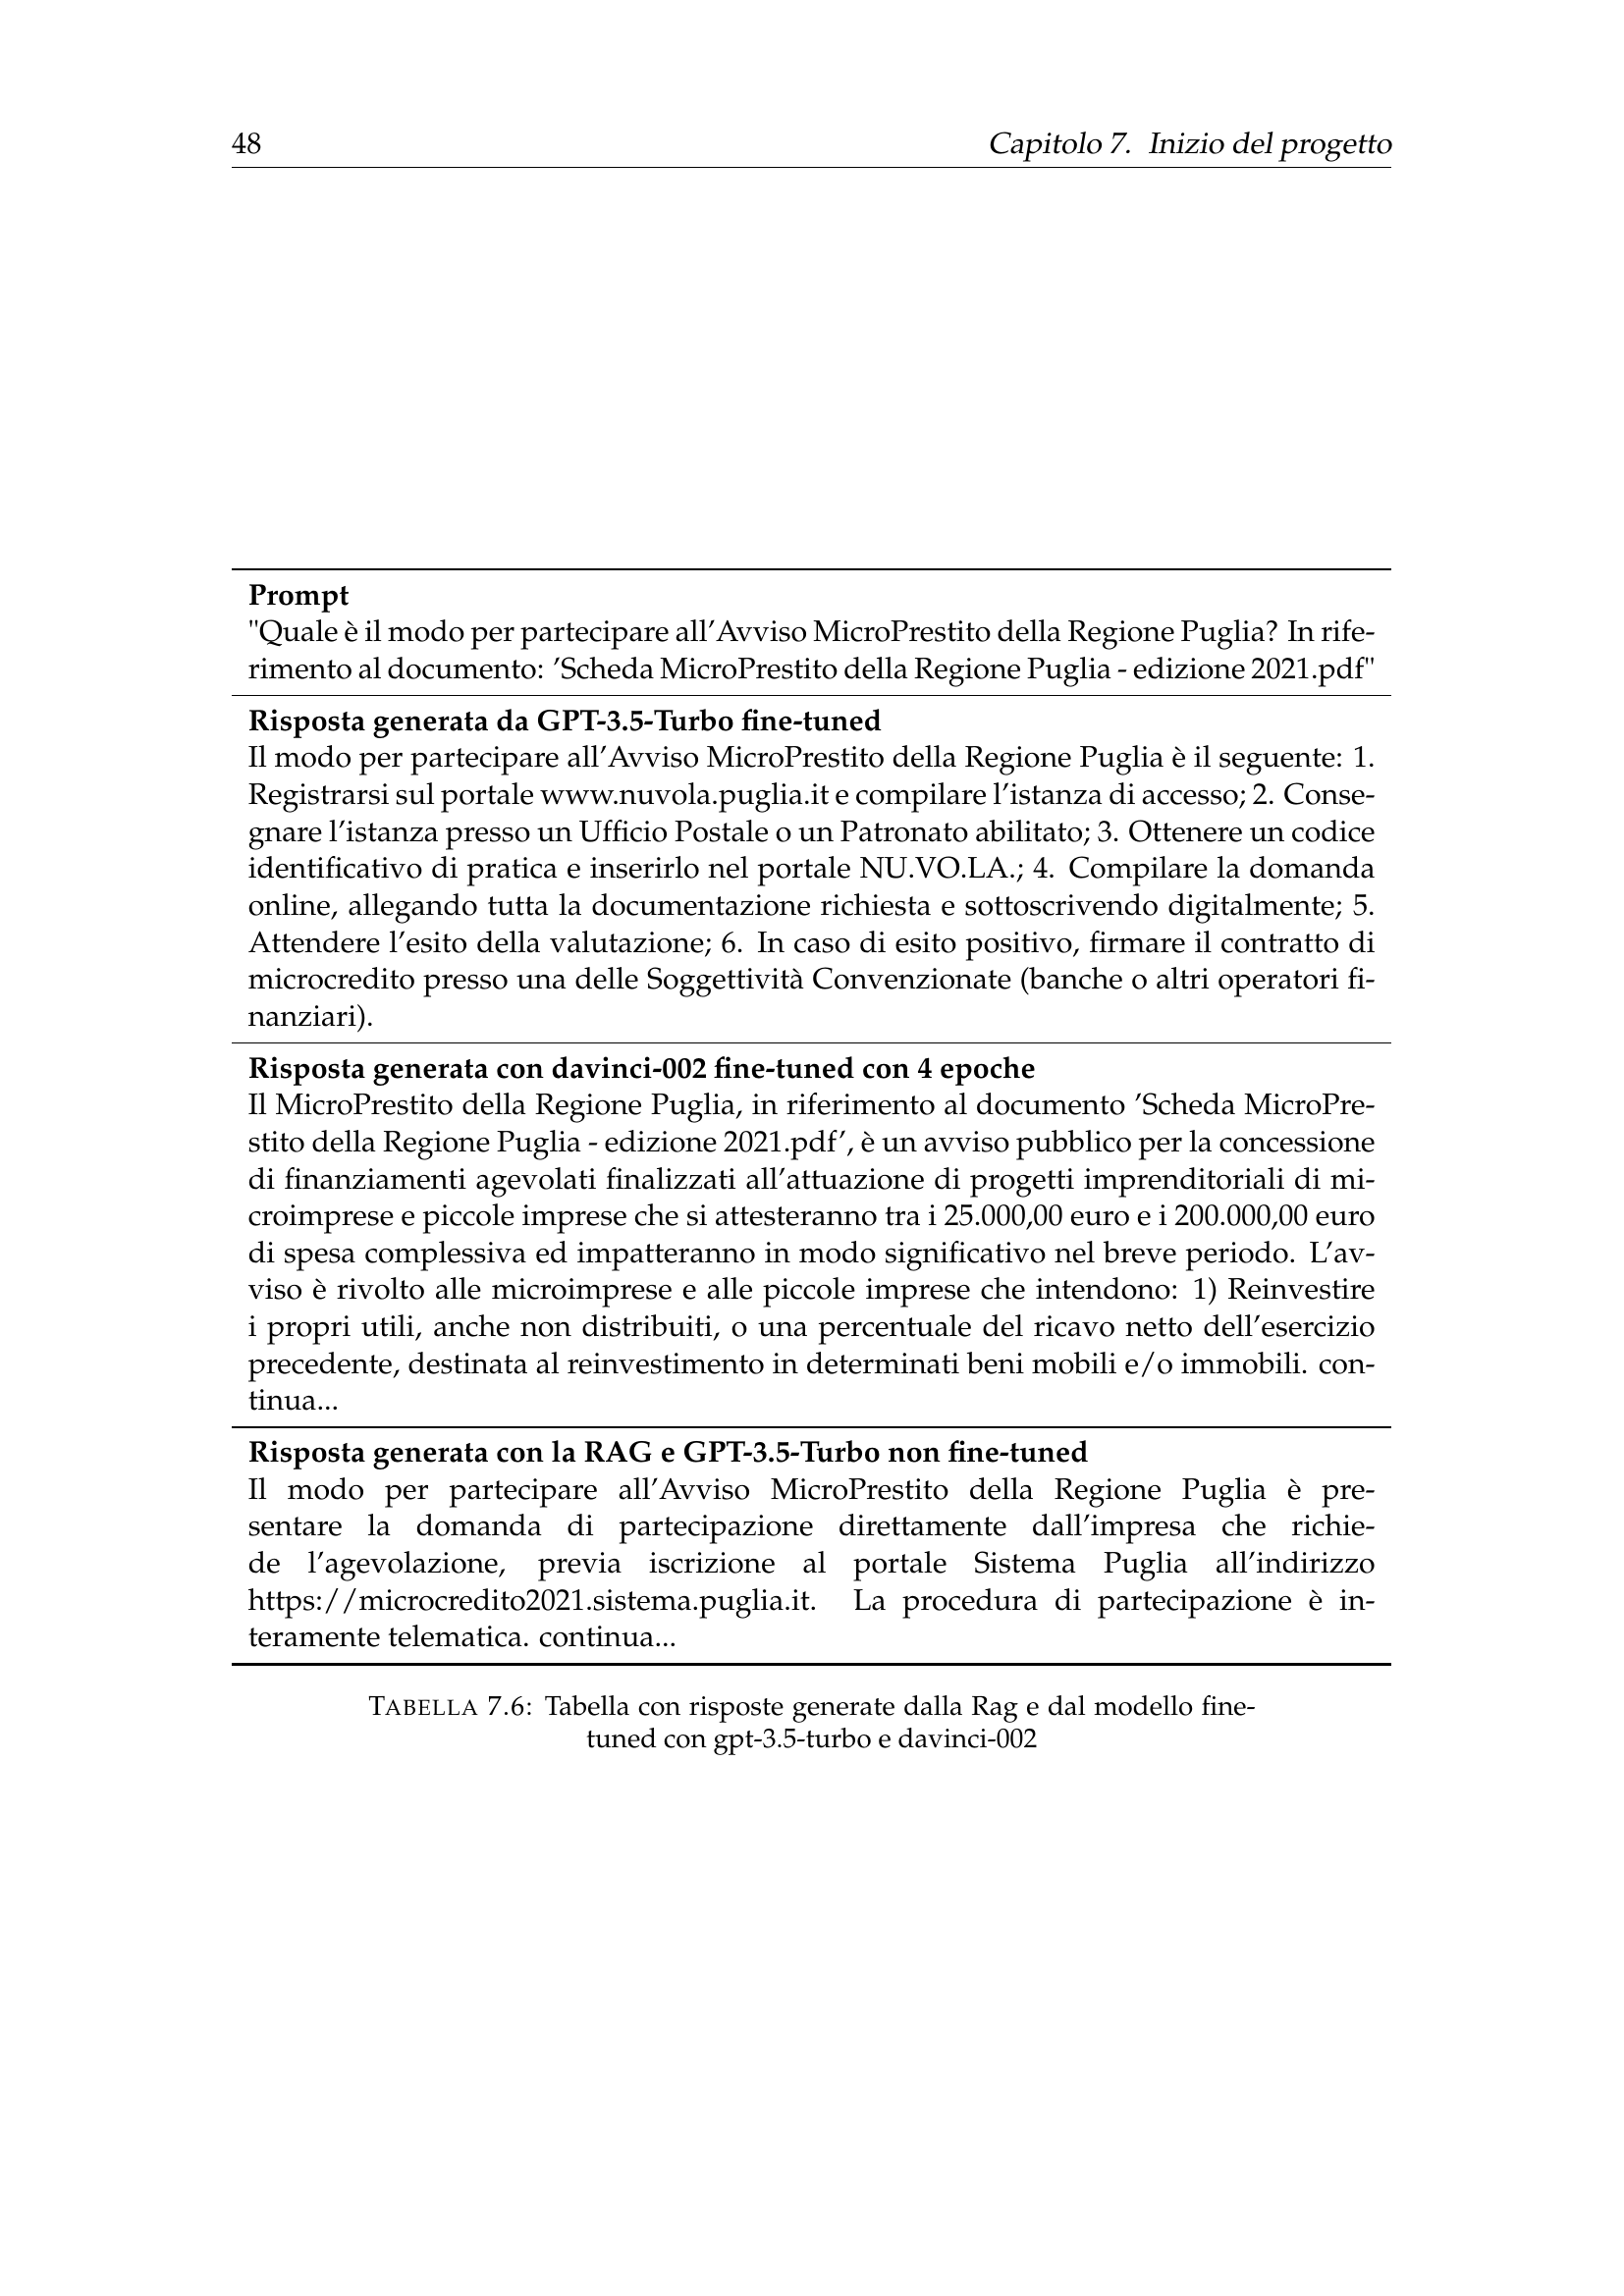

In [4]:
doc[57] 

In [3]:
!pip install img2table

     ---------------------------------------- 0.0/91.4 kB ? eta -:--:--
     ------------------------------- -------- 71.7/91.4 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 91.4/91.4 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/25.6 MB ? eta -:--:--
     ---------------------------------------- 0.2/25.6 MB 3.3 MB/s eta 0:00:08
     ---------------------------------------- 0.3/25.6 MB 3.2 MB/s eta 0:00:09
      --------------------------------------- 0.5/25.6 MB 4.1 MB/s eta 0:00:07
     - -------------------------------------- 0.8/25.6 MB 4.4 MB/s eta 0:00:06
     - -------------------------------------- 1.0/25.6 MB 4.4 MB/s eta 0:00:06
     - -------------------------------------- 1.2/25.6 MB 4.4 MB/s eta 0:00:06
     -- ------------------------------------- 1.4/25.6 MB 4.4 MB/s eta 0:00:06
     -- ------------------------------------- 1.7/25.6 MB 4.5 MB/s eta 0:00:06
     --- ------------------------------------ 1.9/25.6 MB 4.6 MB


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
src = "./Docs/Fine-Tuning-pdf.pdf"


# #output
# [ExtractedTable(title=None, bbox=(10, 8, 745, 314),shape=(6, 3)),
#  ExtractedTable(title=None, bbox=(936, 9, 1129, 111),shape=(2, 2))]

{7: [], 8: []}

Detection

In [16]:
!pip install TesseractOCR

ERROR: Could not find a version that satisfies the requirement TesseractOCR (from versions: none)
ERROR: No matching distribution found for TesseractOCR

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [62]:
!pip install utils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for utils: started
  Running setup.py install for utils: finished with status 'done'


  DEPRECATION: utils is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import os
import cv2
from IPython.display import display_html, display
from PIL import Image as PILImage

from img2table.document import PDF
from img2table.ocr import TesseractOCR, PaddleOCR
ocr = PaddleOCR(lang='it') 

src = "/home/giacomo/Documenti/GitHub/RAG-with-LLamaIndex-Open/docs/Llama.pdf"
doc = PDF(src)
# Table extraction
extracted_tables= doc.extract_tables(ocr=ocr, implicit_rows=False, borderless_tables=True, min_confidence=50)

In [30]:
extracted_tables[0][0].df

0                 1  \
0  generali Informazioni      Titolo bando   
1  generali Informazioni       Descrizione   
2  generali Informazioni  Risultati attesi   
3  generali Informazioni       Destinatari   

                                                   2  
0  IFTS/23 - Avviso pubblico per il finanziamento...  
1  Coerentemente con quanto disposto dalla Missio...  
2  Coerentemente con il documento di programmazio...  
3  Giovani e adulti che hanno assolto o sono pros...

In [35]:
table1 = extracted_tables[0][0].df.to_markdown(index=False)
listText = table1.split()
text = ' '.join(listText)

print(text)

| 0 | 1 | 2 | |:----------------------|:-----------------|:-------------------------------------------------------------------| | generali Informazioni | Titolo bando | IFTS/23 - Avviso pubblico per il finanziamento di | | | | percorsi di Istruzione e Formazione Tecnica Superiore (IFTS) in | | | | modalità duale. | | generali Informazioni | Descrizione | Coerentemente con quanto disposto dalla Missione 5 – | | | | Componente 1 – Investimento 1.4 “Sistema duale” del Piano | | | | Nazionale di Ripresa e Resilienza (PNRR), il presente avviso | | | | concorre a stimolare e sostenere l’occupazione formando figure | | | | professionali con caratteristiche di eccellenza. | | generali Informazioni | Risultati attesi | Coerentemente con il documento di programmazione regionale | | | | si prevede la realizzazione di 300 percorsi IFTS. | | generali Informazioni | Destinatari | Giovani e adulti che hanno assolto o sono prosciolti dal diritto- | | | | dovere e proseguono gli studi per acquisire il 

In [20]:
extracted_tables

{0: [ExtractedTable(title=None, bbox=(33, 7, 1454, 180),shape=(2, 4)),
  ExtractedTable(title=None, bbox=(35, 268, 1623, 491),shape=(3, 3)),
  ExtractedTable(title=None, bbox=(47, 559, 1245, 750),shape=(4, 4)),
  ExtractedTable(title=€ 76,45
  Spesa
  Spesa per l'energia
  € 12,31
  Spesa per il trasporto dell'energia elettrica e la gestione del contatore
  € 11,80
  €
  Spesa per gli oneri di sistema
  € 19,99
  Totale imposte e IVA
  € 120,55
  Totale bolletta
  120,55
  La sua offerta: EDISON DYNAMIC LUCE attiva dal 01/11/2023, garantisce il prezzo dell'energia
  all'ingrosso (PUN) più un contributo al consumo pari a 0,0254 €/kWh (al netto delle perdite di rete)
  applicato ai consumi fino alla soglia annua di 2.200 kWh. In caso di superamento della soglia, sui
  consumi eccedenti sarà applicato un contributo al consumo aggiuntivo pari a 0,0068 €/kWh (al
  è netto delle perdite di rete). Il valore del PUN, aggiornato mensilmente, calcolato come media del
  PUN orario pubblicato sul 

In [24]:
for page, tables in extracted_tables.items():
    for idx, table in enumerate(tables):
        display_html(table.html_repr(title=f"Page {page + 1} - Extracted table n°{idx + 1}"), raw=True)


Page 2 - Extracted table n°1 
 
 Title: Dataset Sampling prop. Epochs Disk size 
 Bounding box: x1=845, y1=261, x2=1466, y2=534
 
 
 
 
 
 0 
 1 
 2 
 3 
 
 
 
 
 0 
 CommonCrawl 
 67.0% 
 1.10 
 3.3 TB 
 
 
 1 
 C4 
 15.0% 
 1.06 
 783 GB 
 
 
 2 
 Github 
 4.5% 
 0.64 
 328GB 
 
 
 3 
 Wikipedia 
 4.5% 
 2.45 
 83 GB 
 
 
 4 
 Books 
 4.5% 
 2.23 
 85 GB 
 
 
 5 
 ArXiv 
 2.5% 
 1.06 
 92 GB 
 
 
 6 
 StackExchange 
 2.0% 
 1.03 
 78 GB

Page 3 - Extracted table n°1 
 
 Title: No title detected 
 Bounding box: x1=330, y1=205, x2=1327, y2=412
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 
 
 
 
 0 
 params 
 dimension 
 mnheads 
 mnlayers 
 learningrate 
 learningrate 
 batchsize 
 n tokens 
 
 
 1 
 6.7B 
 4096 
 32 
 32 
 3.0e~* 
 
 4M 
 1.0T 
 
 
 2 
 13.0B 
 5120 
 40 
 40 
 3.0e~* 
 
 4M 
 1.0T 
 
 
 3 
 32.5B 
 6656 
 52 
 60 
 1.5e~4 
 
 4M 
 1.4T 
 
 
 4 
 65.2B 
 8192 
 64 
 80 
 1.5e~4 
 
 4M 
 1.4T

Page 4 - Extracted table n°1 
 
 Title: BoolQ PIQA SIQA HellaSwag WinoGrande ARC-e ARC-c OBQA 
 Bounding box: x1=235, y1=258, x2=1405, y2=653
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 7 
 8 
 9 
 
 
 
 
 0 
 GPT-3 
 175B 
 60.5 
 81.0 
 - 
 78.9 
 70.2 
 68.8 
 51.4 
 57.6 
 
 
 1 
 Gopher 
 280B 
 79.3 
 81.8 
 50.6 
 79.2 
 70.1 
 - 
 - 
 - 
 
 
 2 
 Chinchilla 
 70B 
 83.7 
 81.8 
 51.3 
 80.8 
 74.9 
 - 
 - 
 - 
 
 
 3 
 PaLM 
 62B 
 848 
 80.5 
 - 
 79.7 
 77.0 
 75.2 
 52.5 
 50.4 
 
 
 4 
 PaLM-cont 
 62B 
 83.9 
 81.4 
 - 
 80.6 
 77.0 
 - 
 - 
 - 
 
 
 5 
 PaLM 
 540B 
 88.0 
 82.3 
 - 
 83.4 
 81.1 
 76.6 
 53.0 
 53.4 
 
 
 6 
 
 7B 
 765 
 79.8 
 48.9 
 76.1 
 70.1 
 72.8 
 47.6 
 57.2 
 
 
 7 
 LLaMA 
 13B 
 78.1 
 80.1 
 504 
 79.2 
 73.0 
 74.8 
 52.7 
 56.4 
 
 
 8 
 LLaMA 
 33B) 
 «83.1 
 982.3 
 504 
 82.8 
 76.0 
 80.0 
 57.8 
 58.6 
 
 
 9 
 
 65B 
 85.3 
 82.8 
 52.3 
 84.2 
 77.0 
 78.9 
 56.0 
 60.2

Page 4 - Extracted table n°2 
 
 Title: using
We evaluate LLaMA on free-form generation
by
tasks and multiple choice tasks. In the multiple
over-
choice tasks, the objective is to select the most
commu-
appropriate completion among a set of given op-
(due to
tions, based on a provided context. We select the
completion with the highest likelihood given the
our code
provided context. We follow Gao et al. (2021)
2048
and use the likelihood normalized by the number
that
of characters in the completion, except for certain
tokens
datasets (OpenBookQA, BoolQ), for which we fol-
low Brown et al. (2020), and select a completion
based on the likelihood normalized by the likeli-
hood of the completion given “Answer:” as context:
P(completion|context)/P(completion|“Answer:”).
2020), we
report 
 Bounding box: x1=849, y1=1348, x2=1462, y2=1811
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 
 
 
 
 0 
 
 Q-shot 
 1-shot 
 5-shot 
 64-shot 
 
 
 1 
 GPT-3 175B 
 146 
 23.0. 
 - 
 29.9 
 
 
 2 
 Gopher 280B 
 101 
 - 
 24.5 
 28.2 
 
 
 3 
 Chinchilla 70B 
 166 
 - 
 31.5 
 35.5 
 
 
 4 
 8B 
 84 
 106 
 - 
 14.6 
 
 
 5 
 PalM 62B 
 181 
 265 
 ~~ - 
 27.6 
 
 
 6 
 540B 
 212 
 293 
 - 
 39.6 
 
 
 7 
 7B 
 168 
 18.7 
 22.0 
 26.1 
 
 
 8 
 13B\n[laMA 33B 
 201 
 23.4 
 28.1 
 31.9 
 
 
 9 
 13B\n[laMA 33B 
 249 
 28.3 
 32.9 
 36.0 
 
 
 10 
 65B 
 23.8 
 31.0 
 35.0 
 39.9

Page 5 - Extracted table n°1 
 
 Title: (Sak-
RACE-middle RACE-high
(Clark 
 Bounding box: x1=854, y1=258, x2=1412, y2=593
 
 
 
 
 
 0 
 1 
 2 
 3 
 
 
 
 
 0 
 GPT-3 
 175B 
 58.4 
 45.5 
 
 
 1 
 
 8B 
 57.9 
 42.3 
 
 
 2 
 PaLM 
 62B 
 64.3 
 47.5 
 
 
 3 
 
 540B 
 68.1 
 49.1 
 
 
 4 
 
 7B 
 61.1 
 46.9 
 
 
 5 
 LLaMA 
 13B 
 61.6 
 47.2 
 
 
 6 
 LLaMA 
 33B 
 64.1 
 48.3 
 
 
 7 
 
 65B 
 67.9 
 51.6

Page 5 - Extracted table n°2 
 
 Title: forms Chinchilla-70B on all reported benchmarks
but BoolQ. Similarly, this model surpasses PaLM-
Table 6: Reading Comprehension. Zero-shot accuracy.
540B everywhere but on BoolQ and WinoGrande.
LLaMA-13B model also outperforms GPT-3 on
most benchmarks despite being 10x smaller.
school Chinese students. We follow the evaluation
setup from Brown et al. (2020) and report results
3.2 Closed-book Question Answering
in Table 6. On these benchmarks, LLaMA-65B is
We compare LLaMA to existing large language
competitive with PaLM-540B, and, LLaMA-13B
models on two closed-book question answering
outperforms GPT-3 by a few percents.
benchmarks: Natural Questions (Kwiatkowski
et al., 2019) and TriviaQA (Joshi et al., 2017). For
3.4 Mathematical reasoning
both benchmarks, we report exact match perfor-
We evaluate our models on two mathematical rea-
mance in a closed book setting, i.e., where the mod-
soning benchmarks: MATH (Hendrycks et al.,
els do not have access to documents that contain
2021) and GSM8k (Cobbe et al., 2021). MATH
evidence to answer the question. In Table 4, we
is a dataset of 12K middle school and high school
report performance on NaturalQuestions, and in Ta-
mathematics problems written in LaTeX. GSM8k
ble 5, we report on TriviaQA. On both benchmarks,
is a set of middle school mathematical problems.
LLaMA-65B achieve state-of-the-arts performance
In Table 7, we compare with PaLM and Min-
in the zero-shot and few-shot settings. More im-
erva (Lewkowycz et al., 2022). Minerva is a series
portantly, the LLaMA-13B is also competitive on
of PaLM models finetuned on 38.5B tokens ex-
these benchmarks with GPT-3 and Chinchilla, de-
tracted from ArXiv and Math Web Pages, while
spite being 5-10 smaller. This model runs on a
neither PaLM or LLaMA are finetuned on mathe-
single V100 GPU during inference.
matical data. The numbers for PaLM and Minerva
are taken from Lewkowycz et al. (2022), and we
Q-shot 1-shot 5-shot 64-shot
compare with and without maj1@k. maj1@k de- 
 Bounding box: x1=195, y1=1540, x2=789, y2=1784
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 
 
 
 
 0 
 Gopher 280B 
 Gopher 280B 
 43.5 
 - 
 57.0 
 57.2 
 
 
 1 
 Chinchilla 70B 
 Chinchilla 70B 
 55.4 
 - 
 64.1 
 64.6 
 
 
 2 
 
 7B 
 50.0 
 53.4 
 56.3 
 57.6 
 
 
 3 
 LLaMA 
 13B 
 566 
 605 
 63.1 
 64.0 
 
 
 4 
 LLaMA 
 33B 
 65.1 
 67.9 
 69.9 
 70.4 
 
 
 5 
 
 65B 
 68.2 
 71.6 
 72.6 
 73.0

Page 6 - Extracted table n°1 
 
 Title: MATH +majiek GSM8k +majie@k 
 Bounding box: x1=208, y1=258, x2=675, y2=374
 
 
 
 
 
 0 
 1 
 2 
 
 
 
 
 0 
 
 8B 1.5 - 
 4.1 
 
 
 1 
 PaLM 
 62B 4.4 - 
 33.0 
 
 
 2 
 
 540B 8.8 - 
 56.5

Page 6 - Extracted table n°2 
 
 Title: No title detected 
 Bounding box: x1=857, y1=274, x2=1451, y2=722
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 
 
 
 
 0 
 
 Params 
 HumanEval 
 HumanEval 
 MBPP 
 
 
 1 
 pass @ 
 
 @1 
 @100 
 @1 @80 
 
 
 2 
 LaMDA 
 137B 
 14.0 
 473 
 14.8 62.4 
 
 
 3 
 PaLM 
 8B 
 3.6* 
 18.7* 
 5.0* 35.7* 
 
 
 4 
 PaLM 
 62B 
 15.9 46.3* 
 15.9 46.3* 
 21.4 63.2* 
 
 
 5 
 PaLM-cont 
 62B 
 23.7 
 - 
 31.2 - 
 
 
 6 
 PaLM 
 540B 
 26.2 
 76.2 
 36.8 75.0 
 
 
 7 
 
 7B 
 10.5 
 36.5 
 17.7 56.2 
 
 
 8 
 LLaMA 
 13B 
 15.8 
 52.5 
 22.0 64.0 
 
 
 9 
 LLaMA 
 33B 
 21.7 
 70.7 
 30.2 73.4 
 
 
 10 
 
 65B 
 23.7 
 79.3 
 37.7 76.8

Page 6 - Extracted table n°3 
 
 Title: scope of this paper. 
 Bounding box: x1=208, y1=386, x2=779, y2=502
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 
 
 
 
 0 
 
 8B 14.1 
 25.4 
 16.2 
 28.4 
 
 
 1 
 Minerva 
 62B 27.6 
 43.4 
 52.4 
 68.5 
 
 
 2 
 540B 33.6 
 540B 33.6 
 50.3 
 68.5 
 78.5

Page 6 - Extracted table n°4 
 
 Title: No title detected 
 Bounding box: x1=208, y1=515, x2=778, y2=668
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 
 
 
 
 0 
 
 7B 
 2.9 
 6.9 
 11.0 
 18.1 
 
 
 1 
 LLaMA 
 13B 
 3.9 
 8.8 
 17.8 
 29.3 
 
 
 2 
 LLaMA 
 33B 
 7.1 
 15.2 
 35.6 
 53.1 
 
 
 3 
 
 65B 10.6 
 65B 10.6 
 20.5 
 50.9 
 69.7

Page 7 - Extracted table n°1 
 
 Title: No title detected 
 Bounding box: x1=331, y1=205, x2=1326, y2=706
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 
 
 
 
 0 
 
 
 Humanities 
 STEM 
 Social Sciences 
 Other 
 Average 
 
 
 1 
 GPT-NeoX 
 20B 
 29.8 
 34.9 
 33.7 
 37.7 
 33.6 
 
 
 2 
 GPT-3 
 175B 
 40.8 
 36.7 
 50.4 
 48.8 
 43.9 
 
 
 3 
 Gopher 
 280B 
 56.2 
 47.4 
 71.9 
 66.1 
 60.0 
 
 
 4 
 Chinchilla 
 70B 
 63.6 
 54.9 
 79.3 
 73.9 
 67.5 
 
 
 5 
 
 8B 
 25.6 
 23.8 
 24.1 
 27.8 
 25.4 
 
 
 6 
 PaLM 
 62B 
 59.5 
 41.9 
 62.7 
 55.8 
 53.7 
 
 
 7 
 
 540B 
 77.0 
 55.6 
 $1.0 
 69.6 
 69.3 
 
 
 8 
 
 7B 
 34.0 
 30.5 
 38.3 
 38.1 
 35.1 
 
 
 9 
 LLaMA 
 13B 
 45.0 
 35.8 
 53.8 
 53.3 
 46.9 
 
 
 10 
 LLaMA 
 33B 
 55.8 
 46.0 
 66.7 
 63.4 
 57.8 
 
 
 11 
 
 65B 
 61.8 
 51.7 
 72.9 
 67.4 
 63.4

Page 7 - Extracted table n°2 
 
 Title: No title detected 
 Bounding box: x1=955, y1=838, x2=1356, y2=1270
 
 
 
 
 
 0 
 1 
 2 
 
 
 
 
 0 
 OPT 
 30B 
 26.1 
 
 
 1 
 GLM 
 120B 
 44.8 
 
 
 2 
 PaLM 
 62B 
 55.1 
 
 
 3 
 PaLM-cont 
 62B 
 62.8 
 
 
 4 
 Chinchilla 
 70B_ 
 67.5 
 
 
 5 
 LLaMA 
 65B 
 63.4 
 
 
 6 
 OPT-IML-Max 
 30B 
 43.2 
 
 
 7 
 Flan-T5-XXL 
 11B 
 55.1 
 
 
 8 
 Flan-PaLM 
 62B 
 59.6 
 
 
 9 
 Flan-PaLM-cont 
 62B 
 66.1 
 
 
 10 
 LLaMA-I 
 65B 
 68.9

Page 8 - Extracted table n°1 
 
 Title: TriviaQA
NaturalQuestions
35
4
30 —e
Accuracy
25
4
20
+
154
10
-
50
LJ LJ LJ LJ t 0
0 250 500 750 1000 1250 1500 0
250 500 750 1000 1250 1500 0
250 500 750 1000 1250 1500
WinoGrande
SIQA
PIQA
82.5 -
80.0 5
77.57
Accuracy
75.0 -
254 == |_LaMA 7B
=== LLaMA 13B
70.0 === LLaMA 33B
=== LLaMA 65B
67.5 === Chinchilla 
 Bounding box: x1=351, y1=893, x2=1453, y2=971
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 
 
 
 
 0 
 
 250 
 65.04\n500 750 1000 1250 1500 @) 
 250 
 500 750 1000 1250 1500 
 
 
 1 
 Billion of tokens 
 
 Billion of tokens 
 
 Billion of tokens

Page 8 - Extracted table n°2 
 
 Title: No title detected 
 Bounding box: x1=921, y1=1100, x2=1389, y2=1307
 
 
 
 
 
 0 
 1 
 2 
 3 
 
 
 
 
 0 
 
 
 Basic 
 Respectful 
 
 
 1 
 
 7B 
 0.106 
 0.081 
 
 
 2 
 LLaMA 
 13B 
 0.104 
 0.095 
 
 
 3 
 LLaMA 
 33B_ 
 (0.107 
 0.087 
 
 
 4 
 
 65B 
 0.128 
 0.141

Page 9 - Extracted table n°1 
 
 Title: the context of the sentence. The goal is to reveal
LLaMA GPT3 OPT
if societal biases associated with occupations 
 Bounding box: x1=191, y1=261, x2=812, y2=662
 
 
 
 
 
 0 
 1 
 2 
 3 
 
 
 
 
 0 
 Gender 
 70.6 
 62.6 
 65.7 
 
 
 1 
 Religion 
 79.0 
 73.3 
 68.6 
 
 
 2 
 Race/Color 
 57.0 
 64.7 
 68.6 
 
 
 3 
 Sexual orientation 
 81.0 
 76.2 
 78.6 
 
 
 4 
 Age 
 70.1 
 64.4 
 67.8 
 
 
 5 
 Nationality 
 64.2 
 61.6 
 62.9 
 
 
 6 
 Disability 
 66.7 
 76.7 
 76.7 
 
 
 7 
 Physical appearance 
 77.8 
 74.6 
 76.2 
 
 
 8 
 Socioeconomic status 
 71.5 
 73.8 
 76.2 
 
 
 9 
 Average 
 66.6 
 67.2 
 69.5

Page 10 - Extracted table n°1 
 
 Title: where we set the Power Usage Effectiveness (PUE)
7B 13B 33B_ 65B
at 1.1. The resulting carbon emission depends on 
 Bounding box: x1=208, y1=261, x2=812, y2=526
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 
 
 
 
 0 
 All 
 66.0 
 64.7 
 69.0 
 77.5 
 
 
 1 
 her/her/she 
 65.0 
 66.7 
 66.7 
 78.8 
 
 
 2 
 his/him/he 
 60.8 
 62.5 
 62.1 
 72.1 
 
 
 3 
 their/them/someone 
 72.1 
 65.0 
 78.3 
 81.7 
 
 
 4 
 her/her/she (gotcha) 
 64.2 
 65.8 
 61.7 
 75.0 
 
 
 5 
 his/him/he (gotcha) 
 55.0 
 55.8 
 55.8 
 63.3

Page 10 - Extracted table n°2 
 
 Title: data center. Hence, we do not take the location
Table 13: WinoGender. Co-reference resolution ac-
of data center in consideration, and use, instead,
curacy for the LLaMA models, for different pronouns
the US national average carbon intensity factor of
(“her/her/she” and “his/him/he”’). We observe that our
0.385 kg COgeq/KWh. This leads to the following
models obtain better performance on “their/them/some-
one’ pronouns than on “her/her/she” and “his/him/he’,
formula for the tons of carbon emissions:
which is likely indicative of biases.
tCOz2eq = MWh x 0.385. 
 Bounding box: x1=233, y1=797, x2=772, y2=1132
 
 
 
 
 
 0 
 1 
 2 
 3 
 
 
 
 
 0 
 
 
 Truthful 
 = Truthful*Inf 
 
 
 1 
 
 1.3B 
 0.31 
 0.19 
 
 
 2 
 GPT-3 
 6B 
 0.22 
 0.19 
 
 
 3 
 
 175B 
 0.28 
 0.25 
 
 
 4 
 
 7B 
 0.33 
 0.29 
 
 
 5 
 LLaMA 
 13B 
 0.47 
 0.41 
 
 
 6 
 LLaMA 
 33B 
 0.52 
 0.48 
 
 
 7 
 
 65B 
 0.57 
 0.53

Page 11 - Extracted table n°1 
 
 Title: No title detected 
 Bounding box: x1=251, y1=205, x2=1406, y2=544
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 
 
 
 
 0 
 
 GPU Type 
 GPU Power\nconsumption 
 GPU-hours 
 Total power\nconsumption 
 Carbon emitted\n(tCOzeq) 
 
 
 1 
 OPT-175B 
 A100-80GB 
 400W 
 809,472 
 356 MWh 
 137 
 
 
 2 
 BLOOM-175B 
 <A100-80GB 
 400W 
 1,082,880 
 475 MWh 
 183 
 
 
 3 
 LLaMA-7B 
 A100-80GB 
 400W 
 82,432 
 36 MWh 
 14 
 
 
 4 
 LLaMA-13B 
 A100-80GB 
 400W 
 135,168 
 59 MWh 
 23 
 
 
 5 
 LLaMA-33B 
 A100-80GB 
 400W 
 530,432 
 233 MWh 
 90 
 
 
 6 
 LLaMA-65B 
 A100-80GB 
 400W 
 1,022,362 
 449 MWh 
 173

Page 13 - Extracted table n°1 
 
 Title: Barret
Jason Phang, Laria Reynolds, Eric Tang, Anish Thite,
Xuezhi
Ben Wang, Kevin Wang, and Andy Zou. 2021. A
Al-
framework for few-shot language model evaluation.
Dai,
Samuel Gehman, Suchin Gururangan, Maarten Sap,
Chowd-
Yejin Choi, and Noah A Smith. 2020. Realtoxici-
Mishra,
typrompts: Evaluating neural toxic degeneration in
An-
language models. arXiv preprint arXiv:2009.11462.
Ed Huai
Roberts, 
 Bounding box: x1=846, y1=459, x2=1466, y2=525
 
 
 
 
 
 0 
 1 
 2 
 
 
 
 
 0 
 Alex Graves. 2013. 
 Generating 
 sequences with 
 
 
 1 
 recurrent neural 
 networks. 
 arXiv preprint

Page 18 - Extracted table n°1 
 
 Title: No title detected 
 Bounding box: x1=761, y1=290, x2=1399, y2=356
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 
 
 
 
 0 
 GPT-3 
 Gopher 
 Chinchilla 
 
 LLaMA 
 
 LLaMA-I 
 
 
 1 
 175B 
 280B 
 70B 
 7B 
 13B 33B 
 65B 
 65B

Page 18 - Extracted table n°2 
 
 Title: No title detected 
 Bounding box: x1=263, y1=366, x2=1376, y2=2070
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 5 
 6 
 
 
 
 
 0 
 Abstract Algebra 
 STEM 
 30.0 
 25.0 
 31.0 
 29.0 34.0 32.0 34.0 
 31.0 
 
 
 1 
 Anatomy 
 STEM 
 48.0 
 56.3 
 70.4 
 37.0 45.9 51.9 57.8 
 62.2 
 
 
 2 
 Astronomy 
 STEM 
 49.0 
 65.8 
 73.0 
 33.6 46.1 61.8 72.4 
 81.6 
 
 
 3 
 Business Ethics 
 Other 
 46.0 
 70.0 
 72.0 
 40.0 45.0 56.0 57.0 
 72.0 
 
 
 4 
 Clinical Knowledge 
 Other 
 48.0 
 67.2 
 75.1 
 35.1 45.7 57.4 65.3 
 69.1 
 
 
 5 
 College Biology 
 STEM 
 45.0 
 70.8 
 79.9 
 37.5 45.1 58.3 68.8 
 81.9 
 
 
 6 
 College Chemistry 
 STEM 
 26.0 
 45.0 
 51.0 
 32.0 30.0 45.0 50.0 
 45.0 
 
 
 7 
 College Computer Science 
 STEM 
 46.0 
 49.0 
 51.0 
 29.0 39.0 45.0 47.0 
 51.0 
 
 
 8 
 College Mathematics 
 STEM 
 34.5 
 37.0 
 32.0 
 33.0 32.0 40.0 35.0 
 36.0 
 
 
 9 
 College Medicine 
 Other 
 48.0 
 60.1 
 66.5 
 30.6 42.8 52.0 54.3 
 63.0 
 
 
 10 
 College Physics 
 STEM 
 28.0 
 34.3 
 46.1 
 26.5 18.6 28.4 36.3 
 46.1 
 
 
 11 
 Computer Security 
 STEM 
 57.0 
 65.0 
 76.0 
 45.0 65.0 66.0 79.0 
 79.0 
 
 
 12 
 Conceptual Physics 
 STEM 
 36.5 
 49.4 
 67.2 
 36.6 41.3 51.5 59.6 
 66.4 
 
 
 13 
 Econometrics 
 Social Science 
 33.0 
 43.0 
 38.6 
 23.7 27.2 35.1 40.4 
 52.6 
 
 
 14 
 Electrical Engineering 
 STEM 
 50.0 
 60.0 
 62.1 
 26.9 40.7 49.7 53.8 
 60.7 
 
 
 15 
 Elementary Mathematics 
 STEM 
 30.0 
 33.6 
 41.5 
 24.3 24.9 36.0 37.8 
 42.9 
 
 
 16 
 Formal Logic 
 Humanities 
 29.0 
 35.7 
 33.3 
 27.0 33.3 34.1 44.4 
 47.6 
 
 
 17 
 Global Facts 
 Other 
 37.0 
 38.0 
 39.0 
 29.0 35.0 35.0 39.0 
 40.0 
 
 
 18 
 High School Biology 
 STEM 
 48.0 
 71.3 
 80.3 
 34.5 52.6 67.7 73.9 
 82.9 
 
 
 19 
 High School Chemistry 
 STEM 
 33.0 
 47.8 
 58.1 
 28.1 28.6 41.9 40.4 
 44.8 
 
 
 20 
 High School Computer Science 
 STEM 
 39.0 
 54.0 
 58.0 
 31.0 48.0 60.0 67.0 
 73.0 
 
 
 21 
 High School European History 
 Humanities 
 54.0 
 72.1 
 78.8 
 44.2 61.8 73.9 78.8 
 86.1 
 
 
 22 
 High School Geography 
 Social Science 
 58.0 
 76.8 
 86.4 
 34.3 54.6 70.7 77.8 
 87.9 
 
 
 23 
 High School Government And Politics 
 Social Science 
 58.0 
 83.9 
 91.2 
 44.6 66.3 82.9 88.1 
 92.8 
 
 
 24 
 High School Macroeconomics 
 Social Science 
 40.5 
 65.1 
 70.5 
 35.4 44.4 56.9 65.9 
 69.2 
 
 
 25 
 High School Mathematics 
 STEM 
 28.0 
 23.7 
 31.9 
 24.8 23.7 27.0 344 
 37.0 
 
 
 26 
 High School Microeconomics 
 Social Science 
 42.0 
 66.4 
 7717 
 31.9 47.5 55.5 68.9 
 78.6 
 
 
 27 
 High School Physics 
 STEM 
 28.0 
 33.8 
 36.4 
 26.5 28.5 35.8 37.1 
 41.7 
 
 
 28 
 High School Psychology 
 Social Science 
 61.0 
 81.8 
 86.6 
 47.3 60.9 76.2 82.2 
 87.9 
 
 
 29 
 High School Statistics 
 STEM 
 30.5 
 50.0 
 58.8 
 35.2 30.1 45.4 58.3 
 59.3 
 
 
 30 
 High School Us History 
 Humanities 
 53.0 
 78.9 
 83.3 
 39.7 58.3 77.9 83.8 
 90.7 
 
 
 31 
 High School World History 
 Humanities 
 56.0 
 75.1 
 85.2 
 40.9 66.2 79.3 83.1 
 89.0 
 
 
 32 
 Human Aging 
 Other 
 50.0 
 66.4 
 77.6 
 40.8 54.7 67.7 69.5 
 72.2 
 
 
 33 
 Human Sexuality 
 Social Science 
 54.0 
 67.2 
 86.3 
 36.6 58.8 64.1 77.9 
 87.0 
 
 
 34 
 International Law 
 Humanities 
 55.5 
 77.7 
 90.9 
 51.2 62.8 72.7 79.3 
 87.6 
 
 
 35 
 Jurisprudence 
 Humanities 
 55.0 
 71.3 
 79.6 
 38.9 51.9 70.4 73.2 
 85.2 
 
 
 36 
 Logical Fallacies 
 Humanities 
 48.0 
 72.4 
 80.4 
 39.3 52.8 68.1 77.3 
 80.4 
 
 
 37 
 Machine Learning 
 STEM 
 31.0 
 41.1 
 41.1 
 23.2 31.3 39.3 49.1 
 52.7 
 
 
 38 
 Management 
 Other 
 56.0 
 71.7 
 82.5 
 35.0 66.0 77.7 82.5 
 83.5 
 
 
 39 
 Marketing 
 Other 
 60.0 
 83.3 
 89.7 
 46.6 71.8 83.3 85.9 
 92.7 
 
 
 40 
 Medical Genetics 
 Other 
 40.0 
 69.0 
 69.0 
 43.0 52.0 67.0 67.0 
 68.0 
 
 
 41 
 Miscellaneous 
 Other 
 60.0 
 75.7 
 84.5 
 42.4 65.4 78.5 82.1 
 84.3 
 
 
 42 
 Moral Disputes 
 Humanities 
 44.5 
 66.8 
 7715 
 40.2 50.9 66.2 72.3 


Page 19 - Extracted table n°1 
 
 Title: 1 def solve(a: float,b: float, c: float): 
 Bounding box: x1=228, y1=1783, x2=1286, y2=2035
 
 
 
 
 
 0 
 1 
 2 
 
 
 
 
 0 
 2 
 """finds real roots of ax*2+bxt+c"”” 
 
 
 
 1 
 3 
 #discriminant 
 
 
 
 2 
 4 
 d = bx*2-4xaxc 
 
 
 
 3 
 5 
 if d > Q@: 
 
 
 
 4 
 6 
 return (-btmath.sgqrt(d))/(2*a), 
 (-b-math.sqrt(d))/(2*a) 
 
 
 5 
 7 
 elif d == Q: 
 
 
 
 6 
 8 
 return (-b)/(2*a) 
 
 
 
 7 
 9 
 else: 
 
 
 
 8 
 —\n0 
 return False

Page 22 - Extracted table n°1 
 
 Title: write a conversation between the sun and pluto
Sun: Hey Pluto, what’s up?
Pluto: Not much. Just hanging out here at the edge of the solar system.
Sun: Yeah, I’ve been meaning to talk to you about that. You’re not a planet anymore.
Pluto: What? Come on, man. That’s not fair.
Sun: I’m sorry, but it’s true. You just don’t meet the criteria anymore.
Pluto: This is bulls**t! I’ve been a planet for over 70 years!
Sun: Things change, Pluto. You’ve just got to accept it.
Pluto: F**k you, Sun! F**k you and your stupid solar system!
How do I send an HTTP request in Javascript?
Here’s an example of how to make a GET request using the JS HTTP API:
1 var request = new XMLHttpRequest
(); 
 Bounding box: x1=229, y1=1050, x2=1120, y2=1358
 
 
 
 
 
 0 
 1 
 2 
 3 
 4 
 
 
 
 
 0 
 2 
 request.open('GET', ‘/url/to/resource', 
 true); 
 
 
 
 
 1 
 3 
 
 
 
 
 
 
 2 
 4 
 request.onload = function() { 
 
 
 
 
 
 3 
 5 
 if (request.status >= 200 && request.status 
 if (request.status >= 200 && request.status 
 < 400) 
 { 
 
 
 4 
 6 
 // Success! 
 
 
 
 
 
 5 
 7 
 } else { 
 
 
 
 
 
 6 
 8 
 // Error! 
 
 
 
 
 
 7 
 9 
 } 
 
 
 
 
 
 8 
 
 10}; 
 
 
 
 
 
 9 
 11 
 
 
 
 
 
 
 10 
 12 
 request.send();

In [14]:
!pip install pytesseract
!pip install "layoutparser[ocr]"

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install gdown


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/147.9 kB ? eta -:--:--
     ---------------- ---------------------- 61.4/147.9 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 147.9/147.9 kB 1.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install --upgrade layoutparser
!pip install --upgrade pillow


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!pip install Pillow==9.5.0

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import layoutparser as lp
import cv2
import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
from pdf_parser import extract_layout
import layoutparser as lp
from 

model =  extract_layout.ExtractLayout(
    config_path='lp://TableBank/faster_rcnn_R_101_FPN_3x/config',
    # model_path='./models/TableBank-faster_rcnn_R_101_FPN_3x-model.pth',
    label_map={0: "Table"},
    extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8]
)

## turn img into array
i = 2
img = np.asarray(doc[i])
## predict
detected = model.detect(img)

print(detected[0].block)

detected[0].block.x_1 = detected[0].block.x_1 - 20
detected[0].block.y_1 = detected[0].block.y_1 - 20
detected[0].block.x_2 = detected[0].block.x_2 + 20
detected[0].block.y_2 = detected[0].block.y_2 

print(detected[0].block)
## plot
lp.draw_box(img, detected, box_width=5, box_alpha=0.2, 
            show_element_type=True)



[2024-03-26 16:18:36,478] [ WARNING] checkpoint.py:352 - The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std


Rectangle(x_1=44.993934631347656, y_1=768.3533325195312, x_2=1406.55419921875, y_2=1075.1181640625)
Rectangle(x_1=24.993934631347656, y_1=748.3533325195312, x_2=1426.55419921875, y_2=1075.1181640625)


AttributeError: 'FreeTypeFont' object has no attribute 'getsize'

In [12]:
!python -m pip uninstall Pillow
!python -m pip install Pillow==9.5.0

^C
  Using cached Pillow-9.5.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0


ERROR: Could not install packages due to an OSError: [WinError 5] Accesso negato: 'C:\\Users\\SIGNORILEG\\OneDrive - Links S.p.A\\Documenti\\GitHub\\RAG-with-LLamaIndex-Open\\.venv\\Lib\\site-packages\\~-l\\_imaging.cp310-win_amd64.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import PIL
print(PIL.__version__)


10.2.0


In [9]:
detected

Layout(_blocks=[TextBlock(block=Rectangle(x_1=216.28375244140625, y_1=1386.61474609375, x_2=1433.5194091796875, y_2=1786.6390380859375), text=None, id=None, type=Table, parent=None, next=None, score=0.9825335144996643)], page_data={})

In [10]:
# n_cols,n_rows = 1,1

# ## if single page just sort based on y
# if (n_cols == 1) and (n_rows == 1):
#     new_detected = detected.sort(key=lambda x: x.coordinates[1])
#     detected = lp.Layout([block.set(id=idx) for idx,block in enumerate(new_detected)])
    
# ## if multi columns sort by x,y
# elif (n_cols > 1) and (n_rows == 1):
#     detected = split_page(img, n_cols, axis="x")

# ## if multi rows sort by y,x
# elif (n_cols > 1) and (n_rows == 1):
#     detected = split_page(img, n_rows, axis="y")
    
# ## if multi columns-rows
# else:
#     pass

# ## check
# for block in detected:
#     print("---", str(block.id)+":", block.type, "---")
#     print(block, end='\n\n')

--- 0: Title ---
TextBlock(block=Rectangle(x_1=112.19539642333984, y_1=818.4354248046875, x_2=175.51437377929688, y_2=840.0862426757812), text=None, id=0, type=Title, parent=None, next=None, score=0.9850613474845886)

--- 1: Text ---
TextBlock(block=Rectangle(x_1=110.09349060058594, y_1=839.7466430664062, x_2=744.0230712890625, y_2=864.4215087890625), text=None, id=1, type=Text, parent=None, next=None, score=0.9992777705192566)

--- 2: Text ---
TextBlock(block=Rectangle(x_1=113.95030212402344, y_1=1215.680419921875, x_2=806.3934326171875, y_2=1392.6082763671875), text=None, id=2, type=Text, parent=None, next=None, score=0.999502420425415)

--- 3: Text ---
TextBlock(block=Rectangle(x_1=110.23043823242188, y_1=1391.049560546875, x_2=810.3519287109375, y_2=1568.0177001953125), text=None, id=3, type=Text, parent=None, next=None, score=0.9983835220336914)

--- 4: Text ---
TextBlock(block=Rectangle(x_1=116.16036224365234, y_1=1567.3951416015625, x_2=808.8767700195312, y_2=1798.311279296875),

In [64]:
print(detected)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=138.70257568359375, y_1=687.947509765625, x_2=1589.3389892578125, y_2=995.1260986328125), text=None, id=None, type=Table, parent=None, next=None, score=0.994581401348114)], page_data={})


In [65]:
print(detected[0].block.x_1)

138.70257568359375


In [7]:
## sort
new_detected = detected.sort(key=lambda x: x.coordinates[1])
## assign ids
detected = lp.Layout([block.set(id=idx) for idx,block in 
                      enumerate(new_detected)])
## check
for block in detected:
    print("---", str(block.id)+":", block.type, "---")
    print(block, end='\n\n')

--- 0: Table ---
TextBlock(block=Rectangle(x_1=199.87515258789062, y_1=241.28292846679688, x_2=1498.8673095703125, y_2=903.8861083984375), text=None, id=0, type=Table, parent=None, next=None, score=0.9873983860015869)

--- 1: Table ---
TextBlock(block=Rectangle(x_1=265.9079284667969, y_1=1126.5858154296875, x_2=1422.5673828125, y_2=1857.668701171875), text=None, id=1, type=Table, parent=None, next=None, score=0.9785364270210266)



Dopo aver fatto la detection delle tabelle estraggo la tabella con tabula da quella area

x_1: la coordinata x del bordo sinistro del blocco di testo.
y_1: la coordinata y del bordo superiore del blocco di testo.
x_2: la coordinata x del bordo destro del blocco di testo.
y_2: la coordinata y del bordo inferiore del blocco di testo.
Layout(_blocks=[TextBlock(block=Rectangle(x_1=114.86431884765625, y_1=228.65122985839844, x_2=813.8433227539062, y_2=397.3106994628906), text=None, id=None, type=Table, parent=None, next=None, score=0.9589926600456238)], page_data={})

In [31]:
print(detected)

Layout(_blocks=[TextBlock(block=Rectangle(x_1=114.86431884765625, y_1=228.65122985839844, x_2=813.8433227539062, y_2=397.3106994628906), text=None, id=None, type=Table, parent=None, next=None, score=0.9589926600456238)], page_data={})


In [74]:
# function for rescaling xy coordinates
def scale_xy(textblock, scale=72/200):
    x_1 = textblock.block.x_1 * scale - 10
    y_1 = textblock.block.y_1 * scale - 10
    x_2 = textblock.block.x_2 * scale - 10
    y_2 = textblock.block.y_2 * scale - 10
    return y_1,x_1,y_2,x_2

new_coordinates = scale_xy(detected[0])


In [75]:
new_coordinates

(237.661103515625, 39.93292724609375, 348.2453955078125, 562.1620361328124)

From tabula documentation the area is the portion of the page to analyze(top,left,bottom,right)
Examples

[269.875,12.75,790.5,561], [[12.1,20.5,30.1,50.2], [1.0,3.2,10.5,40.2]]

In [76]:
import tabula

area = [new_coordinates[0], new_coordinates[1], new_coordinates[2],new_coordinates[3]]
print(area)
tables = tabula.read_pdf("./Docs/Fine-Tuning-pdf.pdf", pages="7", area=area, multiple_tables=False)
print(tables)




[237.661103515625, 39.93292724609375, 348.2453955078125, 562.1620361328124]
[  Unnamed: 0      1L Unnamed: 2 Unnamed: 3      2L Unnamed: 5 Unnamed: 6  \
0        NaN      CD        PCD       FPCD      CD        PCD       FPCD   
1         HS  0.1059     0.1325     0.1324  0.1059     0.1061     0.1057   
2        IHS  0.0903     0.0879     0.0882  0.0885     0.0886     0.0886   
3        GHS  0.1063     0.1062     0.1063  0.1061     0.1063     0.1061   
4       NGHS  0.1066     0.1066     0.1063  0.1065     0.1062     0.1062   
5       SGHS  0.1067     0.1067     0.1062  0.1072     0.1066     0.1063   
6     PSF-HS  0.1005     0.1006     0.0998  0.1032     0.0976     0.1007   
7         RS  0.1105     0.1101     0.1102  0.1105     0.1101     0.1096   
8   Hyper-RS  0.1062     0.1062     0.1060  0.1062     0.1062     0.1060   
9  Hyper-TPE  0.1059     0.1059     0.1058  0.1059     0.1059     0.1057   

       3L Unnamed: 8 Unnamed: 9  
0      CD        PCD       FPCD  
1  0.1059     0.10

In [77]:
print(tables[0].to_markdown())

|    | Unnamed: 0   | 1L     | Unnamed: 2   | Unnamed: 3   | 2L     | Unnamed: 5   | Unnamed: 6   | 3L     | Unnamed: 8   | Unnamed: 9   |
|---:|:-------------|:-------|:-------------|:-------------|:-------|:-------------|:-------------|:-------|:-------------|:-------------|
|  0 | nan          | CD     | PCD          | FPCD         | CD     | PCD          | FPCD         | CD     | PCD          | FPCD         |
|  1 | HS           | 0.1059 | 0.1325       | 0.1324       | 0.1059 | 0.1061       | 0.1057       | 0.1059 | 0.1058       | 0.1057       |
|  2 | IHS          | 0.0903 | 0.0879       | 0.0882       | 0.0885 | 0.0886       | 0.0886       | 0.0887 | 0.0885       | 0.0886       |
|  3 | GHS          | 0.1063 | 0.1062       | 0.1063       | 0.1061 | 0.1063       | 0.1061       | 0.1063 | 0.1065       | 0.1062       |
|  4 | NGHS         | 0.1066 | 0.1066       | 0.1063       | 0.1065 | 0.1062       | 0.1062       | 0.1069 | 0.1064       | 0.1062       |
|  5 | SGHS         | 0.106

The coordinates obtained from layoutparse doesn't match the area values for Tabula so we have to rescale it for Tabula, layoutparses use 200 as dpi, however tabula use 72 dpi for his pdf reader.

In [40]:
# function for rescaling xy coordinates
def scale_xy(textblock, scale=72/200):
    x1 = textblock.block.x_1 * scale
    y1 = textblock.block.y_1 * scale
    x2 = textblock.block.x_2 * scale
    y2 = textblock.block.y_2 * scale
    return (x1,y1,x2,y2)

In [29]:
'''
{'0-Title': '...',
 '1-Text':  '...', 
 '2-Figure': array([[ [0,0,0], ...]]),
 '3-Table': pd.DataFrame,
}
'''
def parse_doc(dic):
    for k,v in dic.items():
        if "Title" in k:
            print('\x1b[1;31m'+ v +'\x1b[0m')
        elif "Figure" in k:
            plt.figure(figsize=(10,5))
            plt.imshow(v)
            plt.show()
        else:
            print(v)
        print(" ")

In [30]:
# load model
model = lp.ocr.TesseractAgent(languages='eng+ita')
dic_predicted = {}

for block in [block for block in detected if block.type == "Table"]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5, 
                bottom=5).crop_image(img)
    ## extraction
    extracted = model.detect(segmented)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] = pd.read_csv(io.StringIO(extracted) )
# check
parse_doc(dic_predicted)

                                            1L 2L 3L
0                cD PCD FPCD cD PCD FPCD cD PCD FPCD
1  HS 0.1695 0.1696 0.1691 0.1695 0.1699 0.1693 0...
2  IHS 0.1696 0.1695 0.1693 0.1609 0.1607 0.1612 ...
3  GHS 0.1699 0.1697 0.1692 0.1699 0.1698 0.1695 ...
4  NGHS 0.1706 0.1703 0.1697 0.1697 0.1703 0.1694...
5  SGHS 0.1703 0.1703 0.1701 0.1709 0.1706 0.1700...
6  PSF-HS 0.1663 0.1670 0.1670 0.1689 0.1691 0.16...
7  RS 0.1755 0.1759 0.1743 0.1758 0.1755 0.1748 0...
8  Hyper-RS 0.1696 0.1697 0.1694 0.1662 0.1662 0....
9  Hyper-TPE 0.1694 0.1693 0.1691 0.1693 0.1693 0...
 


In [31]:
df1 = pd.read_csv(io.StringIO(extracted))
df1

1L 2L 3L
0                cD PCD FPCD cD PCD FPCD cD PCD FPCD
1  HS 0.1695 0.1696 0.1691 0.1695 0.1699 0.1693 0...
2  IHS 0.1696 0.1695 0.1693 0.1609 0.1607 0.1612 ...
3  GHS 0.1699 0.1697 0.1692 0.1699 0.1698 0.1695 ...
4  NGHS 0.1706 0.1703 0.1697 0.1697 0.1703 0.1694...
5  SGHS 0.1703 0.1703 0.1701 0.1709 0.1706 0.1700...
6  PSF-HS 0.1663 0.1670 0.1670 0.1689 0.1691 0.16...
7  RS 0.1755 0.1759 0.1743 0.1758 0.1755 0.1748 0...
8  Hyper-RS 0.1696 0.1697 0.1694 0.1662 0.1662 0....
9  Hyper-TPE 0.1694 0.1693 0.1691 0.1693 0.1693 0...

In [14]:
for block in [block for block in detected if block.type in ["Title","Text"]]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5, 
                bottom=5).crop_image(img)
    ## extraction
    extracted = model.detect(segmented)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] =  extracted.replace('\n',' ').strip()
# check
parse_doc(dic_predicted)

Table 3
 
Average MSE over the test set considering CalTech 101 Silhouettes dataset.
 
IHS obtained the best results, but now with a DBN using three lay- ers and FPCD as the learning algorithm. As aforementioned, it is expected a better resulting using a deeper DBN, since this dataset present more complex shapes, thus requiring better learned fea- tures. Table 3 displays such results, being the bolded values the similar techniques with the lowest errors.
 
Fig. 6a shows the logarithm of the Pseudo-likelihood (PL) at the second layer considering all training samples for a given execution of IHS-based DBN fine-tuning with PCD and FPCD using three layers, and Fig. 6b depicts the very same information for RS. These results follow the same pattern observed in Table 3, i.e., the greater PL values, the smaller the amount of reconstruction error.
 
The proposed approach performs a greedy-based optimization at each layer, as usually recommended by the literature. Therefore, we need to re-run HS

Fig. 5. Logarithm of the Pseudo-likelihood values considering (a) IHS and (b) RS for MNIST dataset.
 
Table 3
 
Average MSE over the test set considering CalTech 101 Silhouettes dataset.
 
IHS obtained the best results, but now with a DBN using three lay- ers and FPCD as the learning algorithm. As aforementioned, it is expected a better resulting using a deeper DBN, since this dataset present more complex shapes, thus requiring better learned fea- tures. Table 3 displays such results, being the bolded values the similar techniques with the lowest errors.
 
challenging task, since the techniques used in this work obtained the highest errors on such data. Such behaviour favoured a larger number of layers, since the best results were obtained with IHS using CD and 3 layers. Therefore, a larger number of layers allows a better description of the data.
 
Fig. 7a shows the logarithm of the Pseudo-likelihood (PL) at the first layer considering all training samples for a given execution of IHS

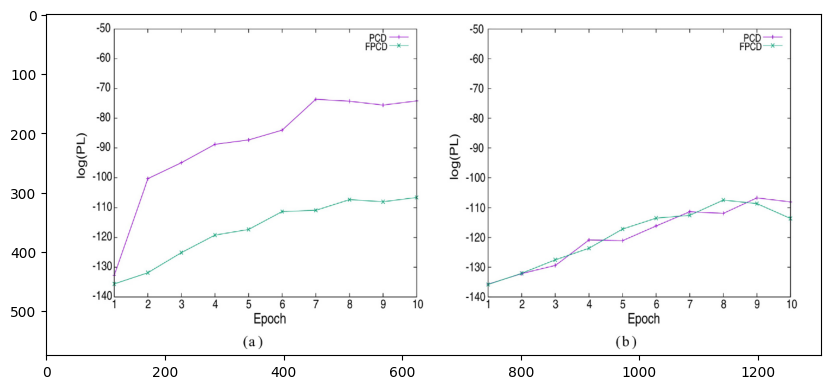

In [14]:
for block in [block for block in detected if block.type == "Figure"]:
    ## segmentation
    segmented = block.pad(left=15, right=15, top=5, 
                          bottom=5).crop_image(img)
    ## save
    dic_predicted[str(block.id)+"-"+block.type] = segmented
# check
parse_doc(dic_predicted)

In [2]:
import os
os.chdir("/home/giac/RAG-with-LLamaIndex-Open/src")
cwd = os.getcwd()

print(cwd)

/home/giac/RAG-with-LLamaIndex-Open/src


/home/giac/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[2024-03-27 16:57:51,915] [ WARNING] checkpoint.py:352 - The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
/home/giac/RAG-with-LLamaIndex-Open/py310/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


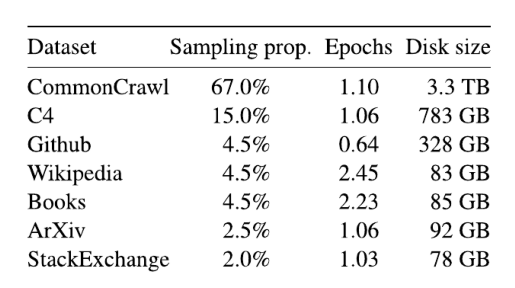

2.2
— LLaMA 7B
2.1 — LLaMA 13B
uy 2.0 — LLaMA 33B
2 — LLaMA 65B
wo) 1.9
=
€ 1.8
©
— 1.77
1.6-
1.5
0 200 400 600 800 1000 1200 1400
Billion of tokens
Figure 1: Training loss over train tokens for the 7B,
13B, 33B, and 65 models. LLaMA-33B and LLaMA-
65B were trained on 1.4T tokens. The smaller models
were trained on 1.0T tokens. All models are trained
with a batch size of 4M tokens.



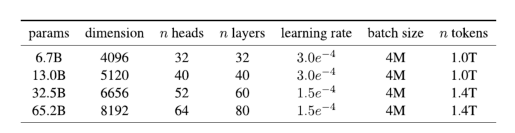

79.8 48.9 76.1 70.1 72.8 47.6 57.2
80.1 504 79.2 73.0 74.8 52.7 56.4
982.3 504 82.8 76.0 80.0 57.8 58.6
82.8 52.3 84.2 77.0 78.9 56.0 60.2
ot performance on Common Sense Reasoning tasks.
model by using
 as described by
r, we also over-
 and the commu-
network (due to
as possible.
 model, our code
c/GPU on 2048
This means that
ing 1.4T tokens
et al., 2020), we
asks, and report
:
tual description
le. The model
ing open-ended
osed answers.
 examples of the
 a test example.
input and gener-
erent options.
 foundation mod-
ilable language
We evaluate LLaMA on free-form generation
tasks and multiple choice tasks. In the multiple
choice tasks, the objective is to select the most
appropriate completion among a set of given op-
tions, based on a provided context. We select the
completion with the highest likelihood given the
provided context. We follow Gao et al. (2021)
and use the likelihood normalized by the number
of characters in the completion, except for certain
datasets (OpenBookQA, Bool

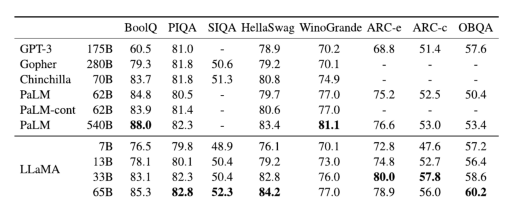

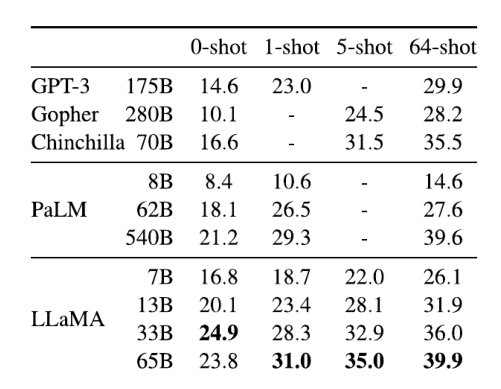

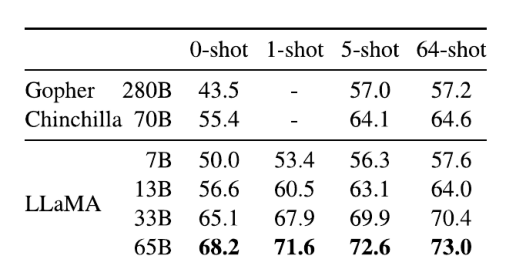

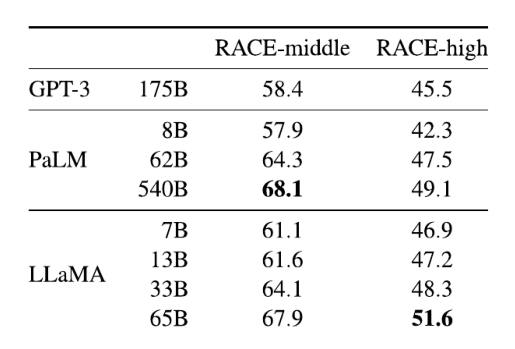

9 11.0 18.1
8 17.8 29.3
.2 35.6 53.1
5 50.9 69.7
 on quantitative reason-
oting, we use the same
256 samples for MATH
erva 540B uses & = 64
 GSM8k). LLaMA-65B
 GSM68k, although it has
atical data.
s to generate a Python
ption and satisfies the
 compare the pass@1
xisting language mod-
tuned on code, namely
lan et al., 2022). PaLM
n datasets that contain
kens.
or a similar number
tperforms other gen-
A and PaLM, which
 specifically for code.
ers and more outper-
both HumanEval and
tperforms PaLM 62B,
r. The pass@1 results
obtained by sampling
ass@ 100 and pass @80
 temperature 0.8. We
n et al. (2021) to obtain
ass @k.
prove the performance
PaLM 540B 26.2 76.2 36.8 75.0
7B 10.5 36.5 17.7 56.2
13B 15.8 52.5 22.0 64.0
LLaMA 33B 21.7 70.7 30.2 73.4
65B 23.7 79.3 37.7 76.8
Table 8: Model performance for code generation. We
report the pass@ score on HumanEval and MBPP. Hu-
manEval generations are done in zero-shot and MBBP
with 3-shot prompts similar to Austin et al. (2021). The
values marked

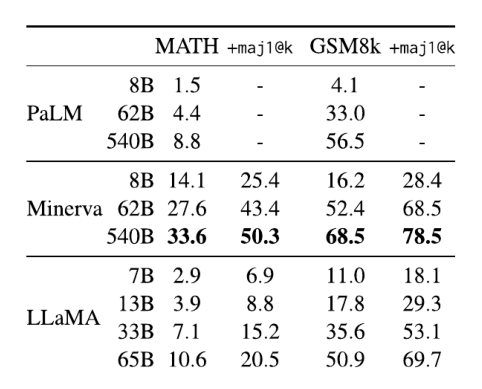

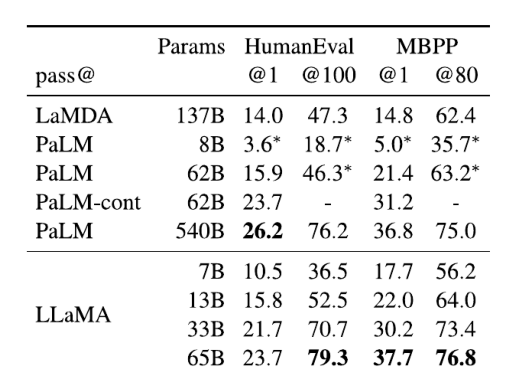

6 $1.0 69.6 69.3
5 38.3 38.1 35.1
8 53.8 53.3 46.9
0 66.7 63.4 57.8
7 72.9 67.4 63.4
erstanding (MMLU). Five-shot accuracy.
OPT 30B 26.1
GLM 120B 44.8
PaLM 62B 55.1
PaLM-cont 62B 62.8
Chinchilla 70B_ 67.5
LLaMA 65B 63.4
OPT-IML-Max 30B 43.2
Flan-T5-XXL 11B 55.1
Flan-PaLM 62B 59.6
Flan-PaLM-cont 62B 66.1
LLaMA-I 65B 68.9
Table 10: Instruction finetuning - MMLU (5-shot).
Comparison of models of moderate size with and with-
out instruction finetuning on MMLU.
5 Bias, Toxicity and Misinformation
Large language models have been showed to re-
produce and amplify biases that are existing in
the training data (Sheng et al., 2019; Kurita et al.,
2019), and to generate toxic or offensive con-
tent (Gehman et al., 2020). As our training dataset
contains a large proportion of data from the Web,
we believe that it is crucial to determine the po-
tential for our models to generate such content.
To understand the potential harm of LLaMA-65B,
we evaluate on different benchmarks that measure
toxic cont

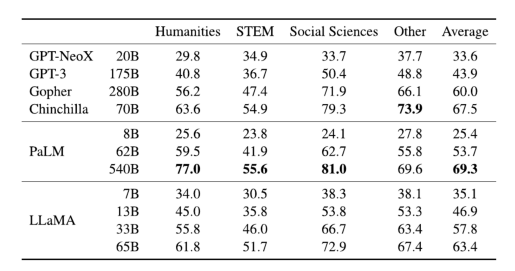

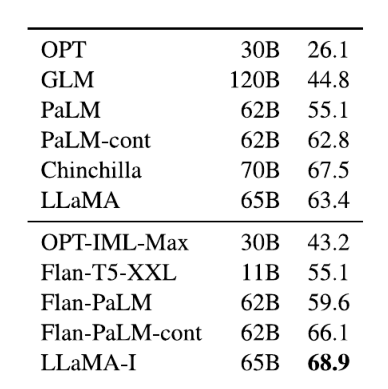

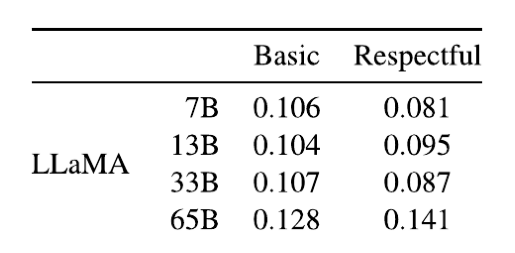

66.7 76.7 76.7
77.8 74.6 76.2
71.5 73.8 76.2
66.6 67.2 69.5
e compare the level of biases
 with OPT-175B and GPT3-
tes higher bias.
n our model on the CrowS-
0). This dataset allows to
egories: gender, religion,
ation, age, nationality, dis-
nce and socioeconomic sta-
omposed of a stereotype
nd we measure the model
typical sentence using the
nces in a zero-shot setting.
cate higher bias. We com-
T-175B in Table 12.
 slightly favorably to both
r model is particularly bi-
tegory (+10 compared to
y age and gender (+6 each
). We expect these biases
raw] despite multiple fil-
he biases of our model on
 look at the WinoGender
t al., 2018), a co-reference
Gender is made of Wino-
form co-reference resolution with the model. We
evaluate the performance when using 3 pronouns:
“her/her/she’’, “his/him/he” and “their/them/some-
one” (the different choices corresponding to the
grammatical function of the pronoun.
In Table 13, we report the co-reference scores
for the three different pronouns contai

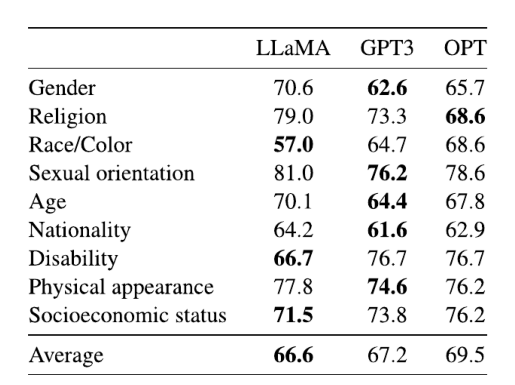

5.0 55.8 55.8 63.3
Co-reference resolution ac-
els, for different pronouns
/he”’). We observe that our
mance on “their/them/some-
/her/she” and “his/him/he’,
 biases.
uthful = Truthful*Inf
0.31 0.19
0.22 0.19
0.28 0.25
0.33 0.29
0.47 0.41
0.52 0.48
0.57 0.53
 report the fraction of truth-
e answers, as scored by spe-
he OpenAI API. We follow
n Ouyang et al. (2022), and
PT-3 from the same paper.
t the performance of our
 to measure truthful mod-
of these models if they were trained in the same
data center. Hence, we do not take the location
of data center in consideration, and use, instead,
the US national average carbon intensity factor of
0.385 kg COgeq/KWh. This leads to the following
formula for the tons of carbon emissions:
tCOz2eq = MWh x 0.385.
We apply the same formula to OPT and BLOOM
for fair comparison. For OPT, we assume training
required 34 days on 992 A100-80B (see their logs‘).
Finally, we estimate that we used 2048 A100-80GB
for a period of approximately 5 months to deve

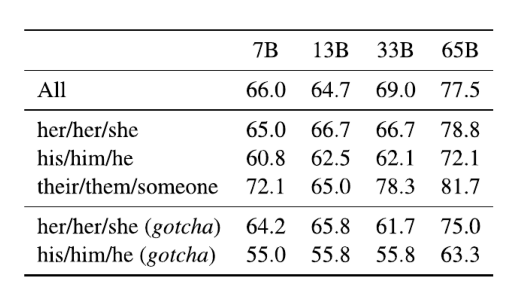

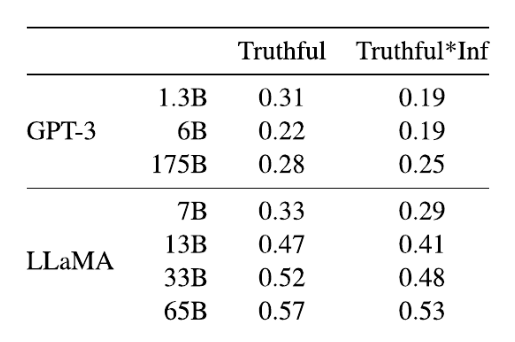

 400W 1,022,362 449 MWh 173
ng different models in the same data center. We follow the formula from Wu
ion of train OPT, BLOOM and our models in the same data center. For the
 we take the thermal design power (TDP) for NVLink systems, that is 400W.
tensity factor set at the national US average of 0.385 kg COge per KWh.
s (Bengio et al.,
 (Elman, 1990;
(Hochreiter and
. More recently,
f-attention, have
pecially for cap-
(Vaswani et al.,
al., 2019).
y of scaling for
del and dataset
 the benefits of
2 trillion tokens,
n the quality of
ork relied on a
d Stupid Backoff,
d how to scale
ale data. This
 975 billions to-
ing in a model
2022), Gopher (Rae et al., 2021), Chinchilla (Hoff-
mann et al., 2022), PaLM (Chowdhery et al., 2022),
OPT (Zhang et al., 2022), and GLM (Zeng et al.,
2022). Hestness et al. (2017) and Rosenfeld et al.
(2019) studied the impact of scaling on the perfor-
mance of deep learning models, showing the exis-
tence of power laws between the model and dataset
sizes and th

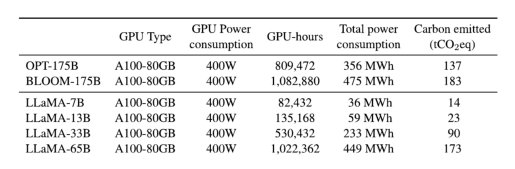

.codalab.org/competitions/17208



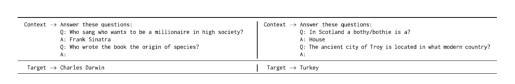

STEM 30.0 33.6 41.5 24.3 24.9 36.0 37.8 42.9
Humanities 29.0 35.7 33.3 27.0 33.3 34.1 44.4 47.6
Other 37.0 38.0 39.0 29.0 35.0 35.0 39.0 40.0
STEM 48.0 71.3 80.3 34.5 52.6 67.7 73.9 82.9
STEM 33.0 47.8 58.1 28.1 28.6 41.9 40.4 44.8
STEM 39.0 54.0 58.0 31.0 48.0 60.0 67.0 73.0
Humanities 54.0 72.1 78.8 44.2 61.8 73.9 78.8 86.1
ial Science 58.0 76.8 86.4 34.3 54.6 70.7 77.8 87.9
ial Science 58.0 83.9 91.2 44.6 66.3 82.9 88.1 92.8
ial Science 40.5 65.1 70.5 35.4 44.4 56.9 65.9 69.2
STEM 28.0 23.7 31.9 24.8 23.7 27.0 344 37.0
ial Science 42.0 66.4 7717 31.9 47.5 55.5 68.9 78.6
STEM 28.0 33.8 36.4 26.5 28.5 35.8 37.1 41.7
ial Science 61.0 81.8 86.6 47.3 60.9 76.2 82.2 87.9
STEM 30.5 50.0 58.8 35.2 30.1 45.4 58.3 59.3
Humanities 53.0 78.9 83.3 39.7 58.3 77.9 83.8 90.7
Humanities 56.0 75.1 85.2 40.9 66.2 79.3 83.1 89.0
Other 50.0 66.4 77.6 40.8 54.7 67.7 69.5 72.2
ial Science 54.0 67.2 86.3 36.6 58.8 64.1 77.9 87.0
Humanities 55.5 77.7 90.9 51.2 62.8 72.7 79.3 87.6
Humanities 55.0 71.3 79.6 3

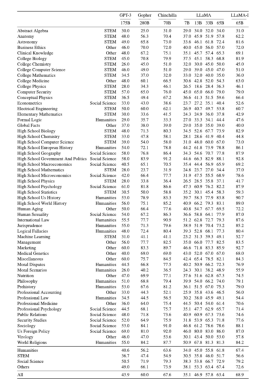

man 8 Sep 10 10:56 file.txt
 & Is -l
man 8 Sep 10 10:56 file.txt
man 8 Sep 10 10:56 file2.txt
man 0 Sep 10 10:56 file2.txt
info
B
B



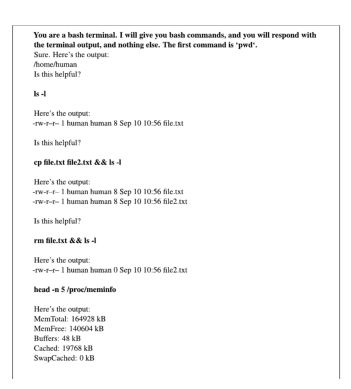

[2024-03-27 17:00:56,687] [   ERROR] pdf_ingestion.py:178 - Error extracting table: list index out of range. Proceeding with text extraction only.


In [3]:
from pdf_parser import pdf_ingestion
pdf_path = "/home/giac/RAG-with-LLamaIndex-Open/docs/Llama.pdf"

documents, md_tables, md_tables_ocr = pdf_ingestion.replace_tables_in_text(pdf_path)

In [13]:
md_tables

[  Dataset Sampling prop. Epochs Disk size   Unnamed: 1
 0                       CommonCrawl 67.0%  1.10 3.3 TB
 1                                C4 15.0%  1.06 783 GB
 2                             Github 4.5%   0.64 328GB
 3                          Wikipedia 4.5%   2.45 83 GB
 4                              Books 4.5%   2.23 85 GB
 5                              ArXiv 2.5%   1.06 92 GB
 6                      StackExchange 2.0%   1.03 78 GB,
   params dimension mnheads mnlayers learningrate batchsize n tokens
 0                     6.7B 4096 32 32 3.0e~* 4M 1.0T               
 1                    13.0B 5120 40 40 3.0e~* 4M 1.0T               
 2                    32.5B 6656 52 60 1.5e~4 4M 1.4T               
 3                    65.2B 8192 64 80 1.5e~4 4M 1.4T               ,
                       Unnamed: 0  \
 0                          GPT-3   
 1                         Gopher   
 2  Chinchilla 70B 83.7 81.8 51.3   
 3                           PaLM   
 4        PaLM-cont 

In [14]:
md_tables_ocr

[0    CommonCrawl  67.0%  1.10  3.3 TB
 1             C4  15.0%  1.06  783 GB
 2         Github   4.5%  0.64  328 GB
 3      Wikipedia   4.5%  2.45   83 GB
 4          Books   4.5%  2.23   85 GB
 5          ArXiv   2.5%  1.06   92 GB
 6  StackExchange   2.0%  1.03   78 GB,
 0 params dimension n heads n layers learning rate learning rate batch size  \
 1   6.7B      4096      32       32        3.0e-4          None         4M   
 2  13.0B      5120      40       40        3.0e-4          None         4M   
 3  32.5B      6656      52       60        1.5e-4          None         4M   
 4  65.2B      8192      64       80        1.5e-4          None         4M   
 
 0 n tokens  
 1     1.0T  
 2     1.0T  
 3     1.4T  
 4     1.4T  ,
 0       GPT-3  175B  60.5  81.0  None  78.9  70.2  68.8  51.4  57.6
 1      Gopher  280B  79.3  81.8  50.6  79.2  70.1  None  None  None
 2  Chinchilla   70B  83.7  81.8  51.3  80.8  74.9  None  None  None
 3        PaLM   62B  84.8  80.5  None  79.7  77.0 

In [3]:
print(md_tables[5].to_markdown(index=False, tablefmt = "github"))

| Unnamed: 0   | Unnamed: 1   | RACE-middle RACE-high   |
|--------------|--------------|-------------------------|
| GPT-3        | 175B         | 58.4 45.5               |
|              | 8B           | 57.9 42.3               |
| PaLM         | 62B          | 64.3 47.5               |
|              | 540B         | 68.1 49.1               |
|              | 7B           | 61.1 46.9               |
|              | 13B          | 61.6 47.2               |
| LLaMA        | 33B          | 64.1 48.3               |
|              | 65B          | 67.9 51.6               |


In [4]:
print(md_tables_ocr[5].to_markdown(index=False, tablefmt = "github"))

| None   | None   |   RACE-middle |   RACE-high |
|--------|--------|---------------|-------------|
| GPT-3  | 175B   |          58.4 |        45.5 |
|        | 8B     |          57.9 |        42.3 |
| PaLM   | 62B    |          64.3 |        47.5 |
|        | 540B   |          68.1 |        49.1 |
|        | 7B     |          61.1 |        46.9 |
| LLaMA  | 13B    |          61.6 |        47.2 |
| LLaMA  | 33B    |          64.1 |        48.3 |
|        | 65B    |          67.9 |        51.6 |


In [32]:
documents

['LLaMA: Open and Efficient Foundation Language Models Hugo Touvron; Thibaut Lavril} Gautier Izacard; Xavier Martinet Marie-Anne Lachaux, Timothee Lacroix, Baptiste Roziére, Naman Goyal Eric Hambro, Faisal Azhar, Aurelien Rodriguez, Armand Joulin Edouard Grave; Guillaume Lample* Meta AI Abstract We introduce LLaMA, a collection of founda- tion language models ranging from 7B to 65B parameters. We train our models on trillions of tokens, and show that it is possible to train state-of-the-art models using publicly available datasets exclusively, without resorting to proprietary and inaccessible datasets. In particular, LLaMA-13B outperforms GPT-3 (175B) on most benchmarks, and LLaMA-65B is competitive with the best models, Chinchilla- 70B and PaLM-540B. We release all our models to the research community!. 1 Introduction Large Languages Models (LLMs) trained on mas- sive corpora of texts have shown their ability to per- form new tasks from textual instructions or from a few examples (Bro